# Module 5 - Capomulin performance analysis 

- Mean of Timepoints per Mouse was 189
- Sample of Male and Female mice is almost 50/50
- From the the most promising treatment regimens: Best performing drugs were Capomulin and Ramicane with a  Final Tumor Volume (mm3) between 30-40(mm3) compared to the  Infubinol and Ceftamin with Final Tumor Volume (mm3) between 50-70(mm3)
- A example of a single mouse that was treated with Capomulin shows that the Tumor volume was reduced by 5(mm3) in 45 days

In [93]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pandas as pd


In [94]:
# Load in csv
mouse_metadata_path = "Pymaceuticals/data/Mouse_metadata.csv"
results_metadata_path = "Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
results_metadata = pd.read_csv(results_metadata_path)




In [95]:
#mearge data adn display preview

mnr_merge_df = pd.merge(results_metadata, mouse_metadata, on="Mouse ID", how="left")
mnr_merge_df.head()
                    

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [96]:
num_of_mice = mnr_merge_df["Mouse ID"].nunique()
print("Number of mice:", num_of_mice)

Number of mice: 249


In [97]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Find duplicate mice based on Mouse ID and Timepoint
duplicate_mice = mnr_merge_df[mnr_merge_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Get the duplicate mice by ID number
duplicate_mice_ids = duplicate_mice['Mouse ID'].unique()

print("Duplicate mice by ID number:")
print(duplicate_mice_ids)

# Drop duplicate mice based on Mouse ID and Timepoint
cleaned_df = mnr_merge_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')

cleaned_df.head()


Duplicate mice by ID number:
['g989']


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Generate Summary Statistics

- Create a DataFrame of summary statistics. Remember, there is more than one method to produce the results you're after, so the method you use is less important than the result. Your summary statistics should include:

    A row for each drug regimen. These regimen names should be contained in the index column.

    A column for each of the following statistics: mean, median, variance, standard deviation, and SEM of the tumor volume.

In [98]:
# Group the data by 'Drug Regimen' and calculate summary statistics for 'Tumor Volume (mm3)'
summary_stats = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for clarity
summary_stats.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']

# Display the DataFrame of summary statistics
print(summary_stats)

                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.393463  50.909965  43.138803            6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


## Create Bar Charts and Pie Charts

1. Generate two bar charts. Both charts should be identical and show the total total number of rows (Mouse ID/Timepoints) for each drug regimen throughout the study.
- Create the first bar chart with the Pandas DataFrame.plot() method.
- Create the second bar chart with Matplotlib's pyplot methods.
2. Generate two pie charts. Both charts should be identical and show the distribution of unique female versus male mice in the study.
- Create the first pie chart with the Pandas DataFrame.plot() method.
- Create the second pie chart with Matplotlib's pyplot methods.

In [99]:
# Group the data by 'Drug Regimen' and count the number of rows for each group
drug_regimen_counts = cleaned_df.groupby('Drug Regimen').size()
drug_regimen_counts.head(10)


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
dtype: int64

In [100]:
# Calculate the mean of the DataFrame
df_mean = drug_regimen_counts.mean()
print(df_mean)

188.8


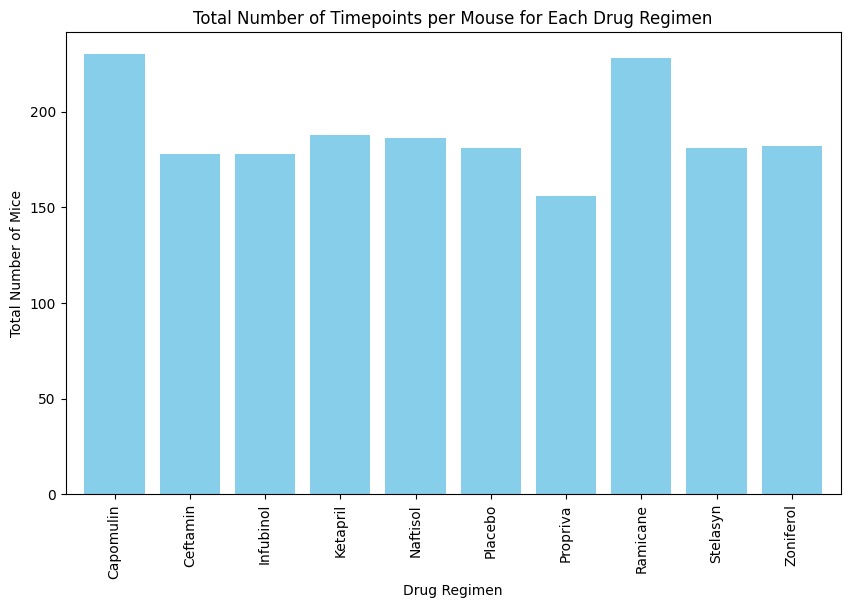

In [101]:
# Create a bar chart using the DataFrame.plot() method
drug_regimen_counts.plot(kind='bar', figsize=(10, 6), color='skyblue', width=0.8)

# Set the title and labels for the plot
plt.title('Total Number of Timepoints per Mouse for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Mice')

# Show the plot
plt.show()

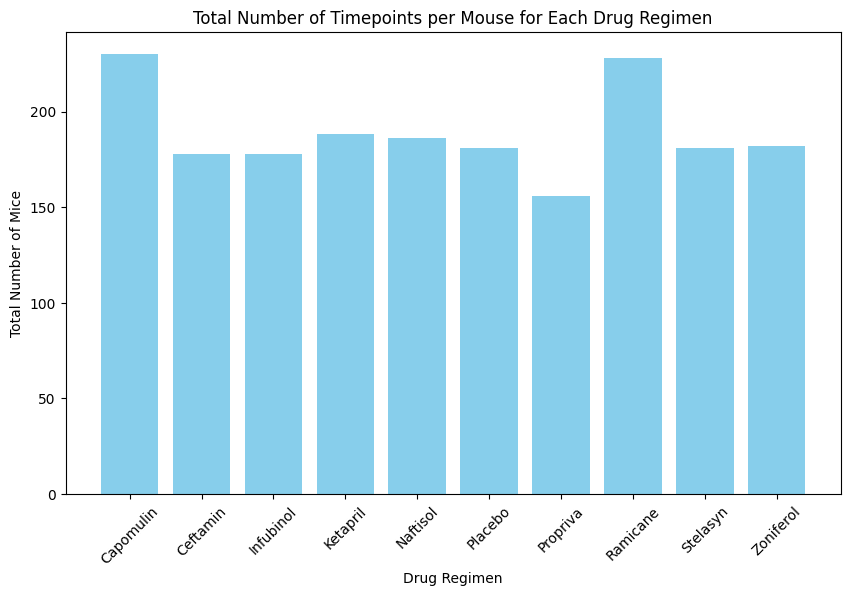

In [102]:
# Create a bar chart using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(drug_regimen_counts.index, drug_regimen_counts, color='skyblue')

# Set the title and labels for the plot
plt.title('Total Number of Timepoints per Mouse for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Mice')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [103]:
# Count the number of unique female and male mice
gender_counts = cleaned_df['Sex'].value_counts()

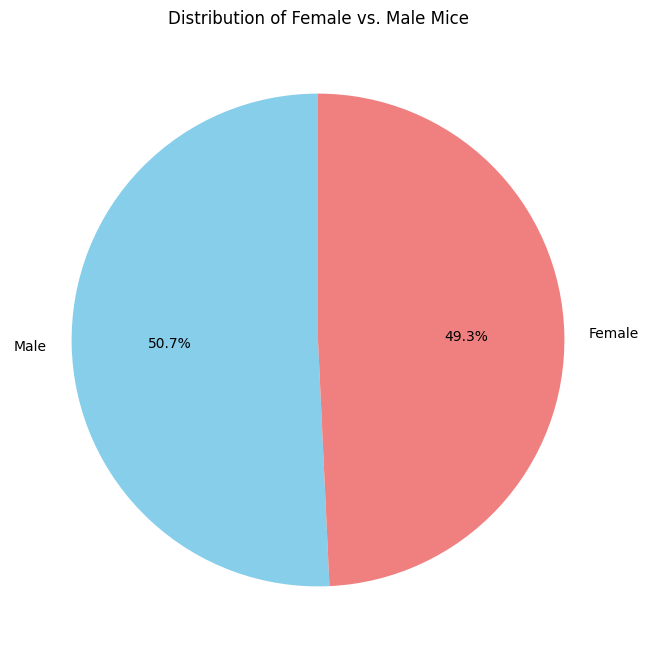

In [104]:
# Create a pie chart using the DataFrame.plot() method
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], figsize=(8, 8), startangle=90)

# Set the title for the pie chart
plt.title('Distribution of Female vs. Male Mice')

# Hide the y-label on the pie chart
plt.ylabel('')

# Show the plot
plt.show()

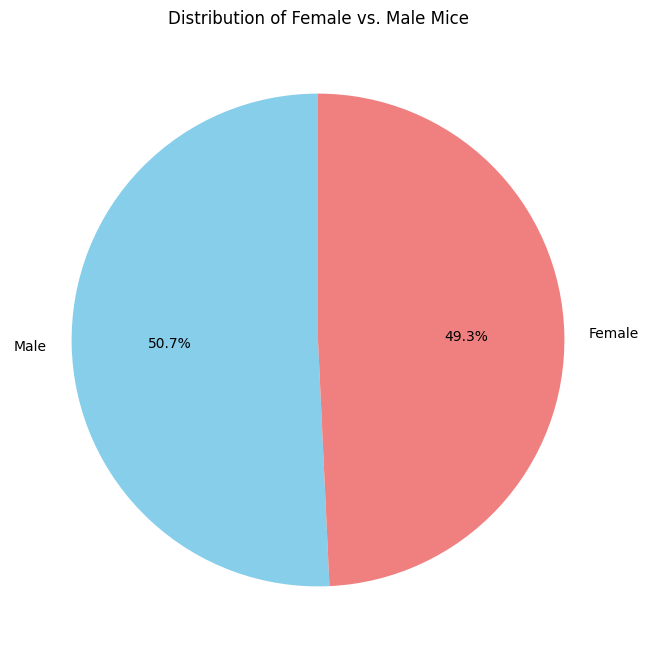

In [105]:
# Create a pie chart using Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)

# Set the title for the pie chart
plt.title('Distribution of Female vs. Male Mice')

# Show the plot
plt.show()

## Calculate Quartiles, Find Outliers, and Create a Box Plot
1. Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Then, calculate the quartiles and IQR, and determine if there are any potential outliers across all four treatment regimens. Use the following substeps:
- Create a grouped DataFrame that shows the last (greatest) time point for each mouse. Merge this grouped DataFrame with the original cleaned DataFrame.
- Create a list that holds the treatment names as well as a second, empty list to hold the tumor volume data.
- Loop through each drug in the treatment list, locating the rows in the merged DataFrame that correspond to each treatment. Append the resulting final tumor volumes for each drug to the empty list.
- Determine outliers by using the upper and lower bounds, and then print the results.

2. Using Matplotlib, generate a box plot that shows the distribution of the final tumor volume for all the mice in each treatment group. Highlight any potential outliers in the plot by changing their color and style.

In [106]:

# Create a grouped DataFrame to find the last time point for each mouse
max_timepoint_df = cleaned_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
max_timepoint_df.columns = ['Mouse ID', 'Timepoint']

# Merge the grouped DataFrame with the original cleaned DataFrame
MaxTimepoint_df = pd.merge(cleaned_df, max_timepoint_df, on=['Mouse ID', 'Timepoint'], how='inner')

# List of treatment names
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Empty list to hold tumor volume data
tumor_volume_data = []

# Loop through each treatment and append the final tumor volumes to the list
for treatment in treatments:
    final_tumor_volumes = MaxTimepoint_df.loc[MaxTimepoint_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_volume_data.append(final_tumor_volumes)

# Determine outliers using the upper and lower bounds and print the results
for i, treatment in enumerate(treatments):
    quartiles = tumor_volume_data[i].quantile([0.25, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr

    outliers = tumor_volume_data[i][(tumor_volume_data[i] < lower_bound) | (tumor_volume_data[i] > upper_bound)]
    
    print(f"Potential outliers for {treatment}: {outliers}")

Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 20    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


/var/folders/wr/cxxdrkjs7fx82z7ww61l665r0000gn/T/ipykernel_31442/1657655264.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_volume_data, labels=treatments, patch_artist=True, showfliers=True, flierprops=dict(marker='o', markerfacecolor='red', markersize=8))


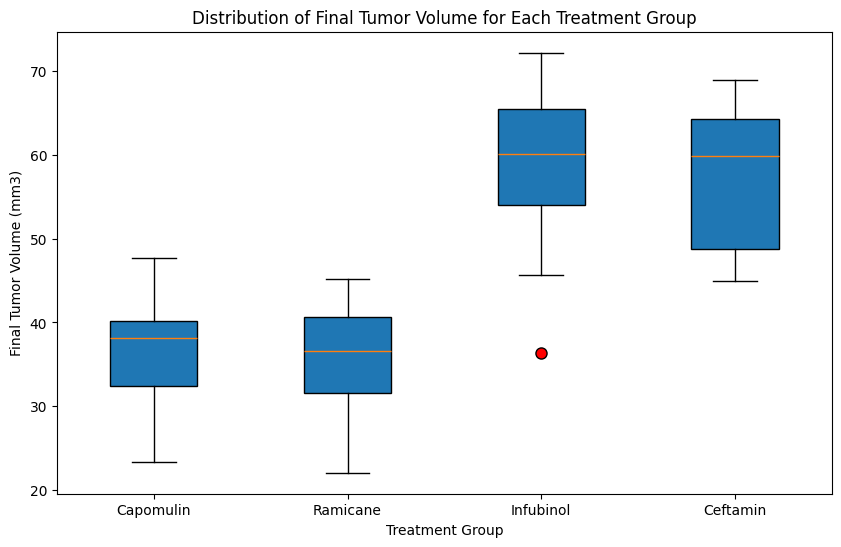

In [107]:
# Create a box plot with potential outliers highlighted
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volume_data, labels=treatments, patch_artist=True, showfliers=True, flierprops=dict(marker='o', markerfacecolor='red', markersize=8))

# Set the title and labels for the plot
plt.title('Distribution of Final Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Final Tumor Volume (mm3)')

# Show the plot
plt.show()

## Create a Line Plot and a Scatter Plot


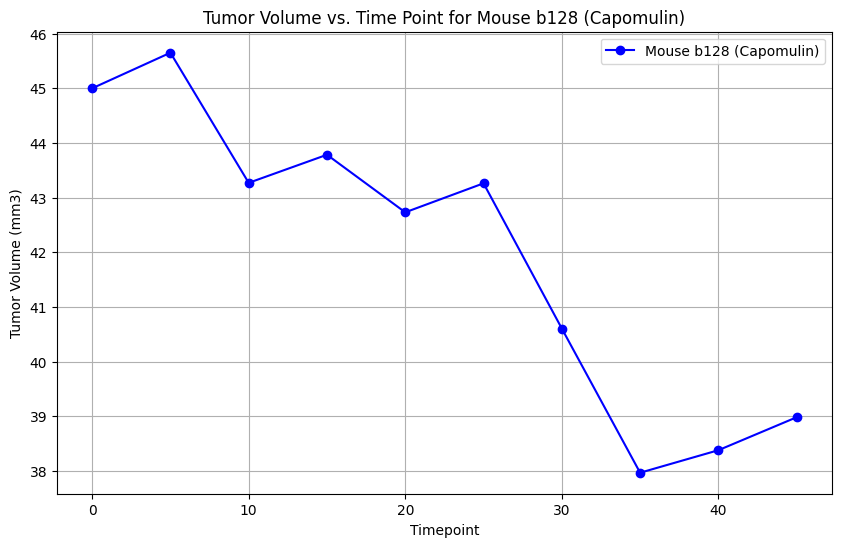

In [108]:
#Select a single mouse that was treated with Capomulin, and generate a line plot of tumor volume versus time point for that mouse.
# Filter the cleaned_df DataFrame for the mouse with ID b128 and treated with Capomulin
mouse_b128_capomulin = cleaned_df[(cleaned_df['Mouse ID'] == 'b128') & (cleaned_df['Drug Regimen'] == 'Capomulin')]

# Create a line plot for the tumor volume versus time point
plt.figure(figsize=(10, 6))
plt.plot(mouse_b128_capomulin['Timepoint'], mouse_b128_capomulin['Tumor Volume (mm3)'], marker='o', color='b', label='Mouse b128 (Capomulin)')
plt.title('Tumor Volume vs. Time Point for Mouse b128 (Capomulin)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.legend()
plt.show()


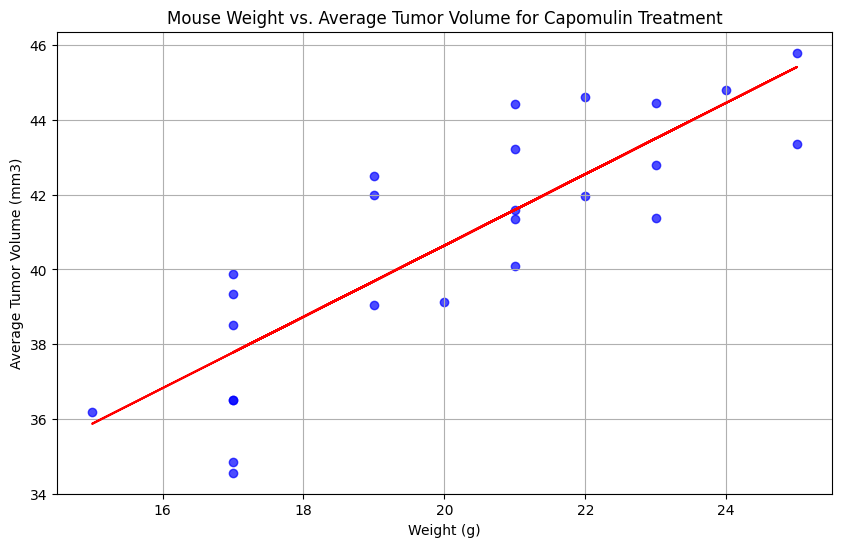

In [109]:
# Group the data by Mouse ID and calculate the average tumor volume and weight for each mouse treated with Capomulin
capomulin_data = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']
avg_data = capomulin_data.groupby('Mouse ID').agg({'Weight (g)' : 'mean', 'Tumor Volume (mm3)' : 'mean'}).reset_index()

from scipy.stats import linregress

# Create a scatter plot for mouse weight versus average tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(avg_data['Weight (g)'], avg_data['Tumor Volume (mm3)'], color='b', alpha=0.7)

# Fit a linear regression line to the data
slope, intercept, r_value, p_value, std_err = linregress(avg_data['Weight (g)'], avg_data['Tumor Volume (mm3)'])
plt.plot(avg_data['Weight (g)'], slope * avg_data['Weight (g)'] + intercept, color='r', label='Trend Line')

plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Treatment')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()